In [ ]:
# import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [7]:
# load the data set into python libraries
df = pd.read_csv('A:\\ML_Projects\\ML_Project_02\\Model_Building\\train.csv')
df.head()

battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  m_dep  \
0            842     0          2.2         0   1       0           7    0.6   
1           1021     1          0.5         1   0       1          53    0.7   
2            563     1          0.5         1   2       1          41    0.9   
3            615     1          2.5         0   0       0          10    0.8   
4           1821     1          1.2         0  13       1          44    0.6   

   mobile_wt  n_cores  ...  px_height  px_width   ram  sc_h  sc_w  talk_time  \
0        188        2  ...         20       756  2549     9     7         19   
1        136        3  ...        905      1988  2631    17     3          7   
2        145        5  ...       1263      1716  2603    11     2          9   
3        131        6  ...       1216      1786  2769    16     8         11   
4        141        2  ...       1208      1212  1411     8     2         15   

   three_g  touch_screen  wifi  price_range  
0        0             0     1            1  
1        1             1     0            2  
2        1             1     0            2  
3        1             0     0            2  
4        1             1     0            1  

[5 rows x 21 columns]

In [8]:
df.shape

(2000, 21)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

battery_power: This denotes the battery power of the mobile
blue: This tells if the mobile has bluetooth or
clock_speed: This denotes the clock speed of the mobile
dual_sim: This tells if the mobile has dual sim or not
fc: This denotes the front camera capacity of the mobile
four_g: This tells if the mobile has 4G or not
int_memory: This denotes the internal memory capacity of the mobile
m_dep: This denotes the mobile depth
mobile_wt: This denotes the mobile weight
n_cores: This denotes the number of cores the mobile has
pc: This denotes the primary camera capacity of the mobile
px_height: This denotes the pixel height in the mobile
px_width: This denotes the pixel width in the mobile
ram: This denotes the ram capacity of the mobile
sc_h: This denotes the screen height
sc_w: This denotes the screen width
talk_time: This denotes the talk time of the mobile
three_g: This tells if the mobile has 3G or not
touch_screen: This tells if the mobile has touch screen or not
wifi: This tells if the mobile has wifi or not
price_range: This is the target variable, depending on all the other variables, it tells the price range of the mobile either in 0, 1, 2, or 3

In [10]:
df.nunique()

battery_power    1094
blue                2
clock_speed        26
dual_sim            2
fc                 20
four_g              2
int_memory         63
m_dep              10
mobile_wt         121
n_cores             8
pc                 21
px_height        1137
px_width         1109
ram              1562
sc_h               15
sc_w               19
talk_time          19
three_g             2
touch_screen        2
wifi                2
price_range         4
dtype: int64

*Identified Categorical Variables-blue,dual_sim,four_g ,n_cores ,three_g ,touch_screen,wifi,price_range,sc_h,sc_w,talk_time
*Identified Numerical Variables-battery_power,clock_speed,fc,int_memory,mobile_wt,pc,px_height,px_width,ram

In [11]:
df.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

In [12]:
(df.isnull().sum()/(len(df)))*100

battery_power    0.0
blue             0.0
clock_speed      0.0
dual_sim         0.0
fc               0.0
four_g           0.0
int_memory       0.0
m_dep            0.0
mobile_wt        0.0
n_cores          0.0
pc               0.0
px_height        0.0
px_width         0.0
ram              0.0
sc_h             0.0
sc_w             0.0
talk_time        0.0
three_g          0.0
touch_screen     0.0
wifi             0.0
price_range      0.0
dtype: float64

In [13]:
df.duplicated().sum()

np.int64(0)

Exploratory Data Analysis

In [14]:
Group_1 = df[['battery_power', 'clock_speed', 'fc', 'int_memory', 'mobile_wt', 'pc', 'px_height', 'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'price_range']]  
Group_1.describe().T

count        mean          std    min      25%     50%  \
battery_power  2000.0  1238.51850   439.418206  501.0   851.75  1226.0   
clock_speed    2000.0     1.52225     0.816004    0.5     0.70     1.5   
fc             2000.0     4.30950     4.341444    0.0     1.00     3.0   
int_memory     2000.0    32.04650    18.145715    2.0    16.00    32.0   
mobile_wt      2000.0   140.24900    35.399655   80.0   109.00   141.0   
pc             2000.0     9.91650     6.064315    0.0     5.00    10.0   
px_height      2000.0   645.10800   443.780811    0.0   282.75   564.0   
px_width       2000.0  1251.51550   432.199447  500.0   874.75  1247.0   
ram            2000.0  2124.21300  1084.732044  256.0  1207.50  2146.5   
sc_h           2000.0    12.30650     4.213245    5.0     9.00    12.0   
sc_w           2000.0     5.76700     4.356398    0.0     2.00     5.0   
talk_time      2000.0    11.01100     5.463955    2.0     6.00    11.0   
price_range    2000.0     1.50000     1.118314    0.0     0.75     1.5   

                   75%     max  
battery_power  1615.25  1998.0  
clock_speed       2.20     3.0  
fc                7.00    19.0  
int_memory       48.00    64.0  
mobile_wt       170.00   200.0  
pc               15.00    20.0  
px_height       947.25  1960.0  
px_width       1633.00  1998.0  
ram            3064.50  3998.0  
sc_h             16.00    19.0  
sc_w              9.00    18.0  
talk_time        16.00    20.0  
price_range       2.25     3.0

* On average of int-memory in mobile phones are ~32. The range show a huge difference between min and max. Max vaiues show 64. It may show the evidence of outlier.
* It looks like FC, PX-height and Sc-w have outliers, and the data is right-skewed.
* The average of ram and pc in a mobile phone is 2124.21300 and 9.91650. These are important feature in price contribution.

In [15]:
# Before do EDA, lets separate Numerical and categorical variables for easy analysis
num_cols= df[['battery_power', 'clock_speed', 'fc', 'int_memory', 'mobile_wt', 'pc', 'px_height', 'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time']]
cat_cols = df[['blue','dual_sim','four_g','three_g','touch_screen','wifi','m_dep','n_cores','price_range']]

EDA Univariate Analysis


Column: battery_power
Skew : 0.03


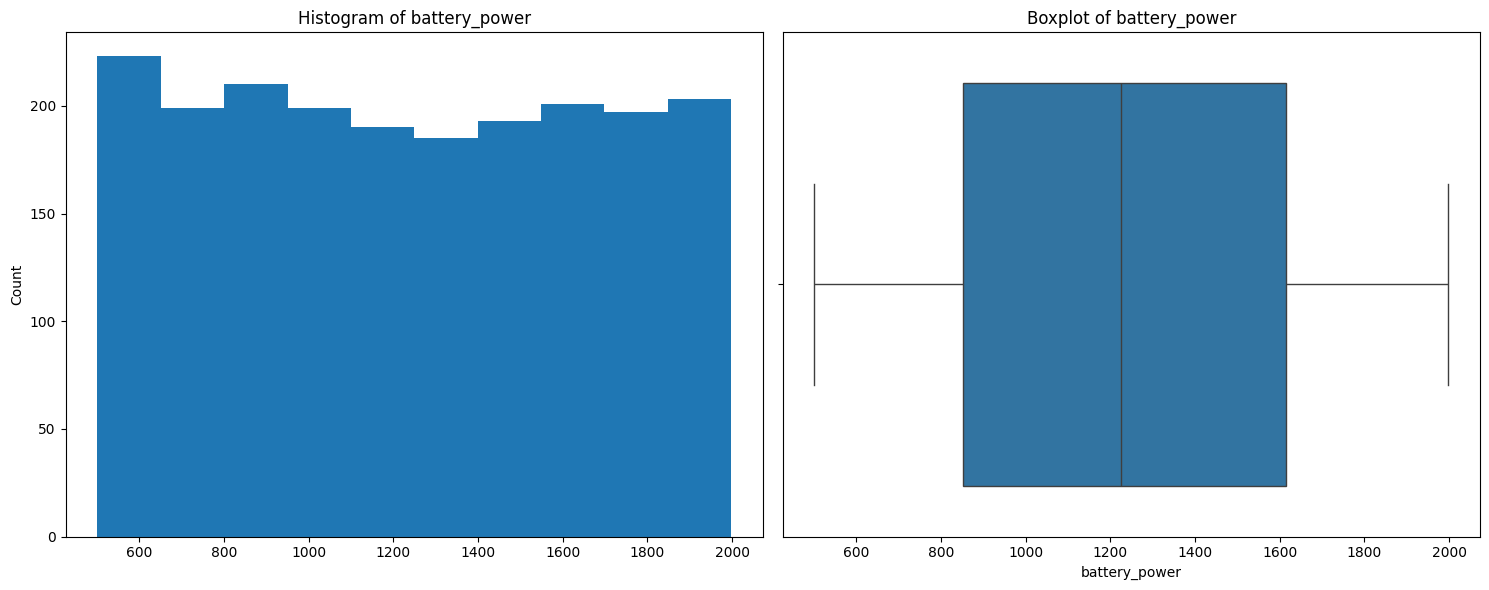


Column: clock_speed
Skew : 0.18


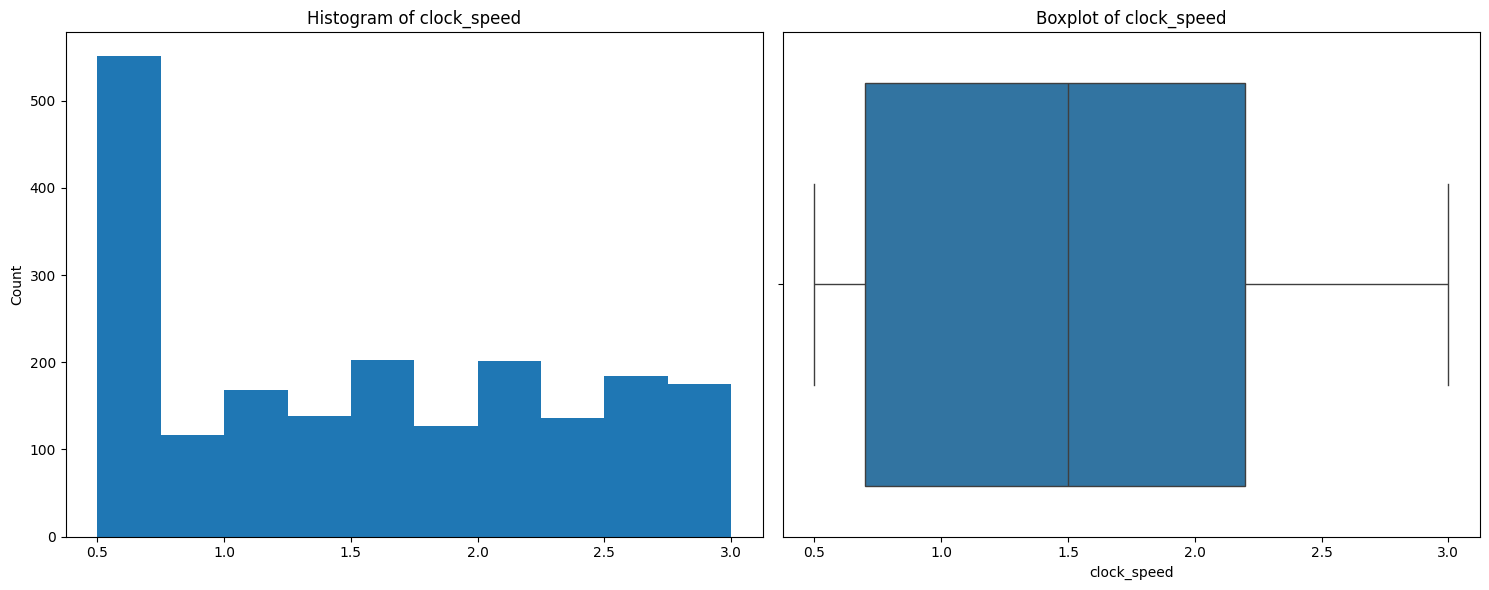


Column: fc
Skew : 1.02


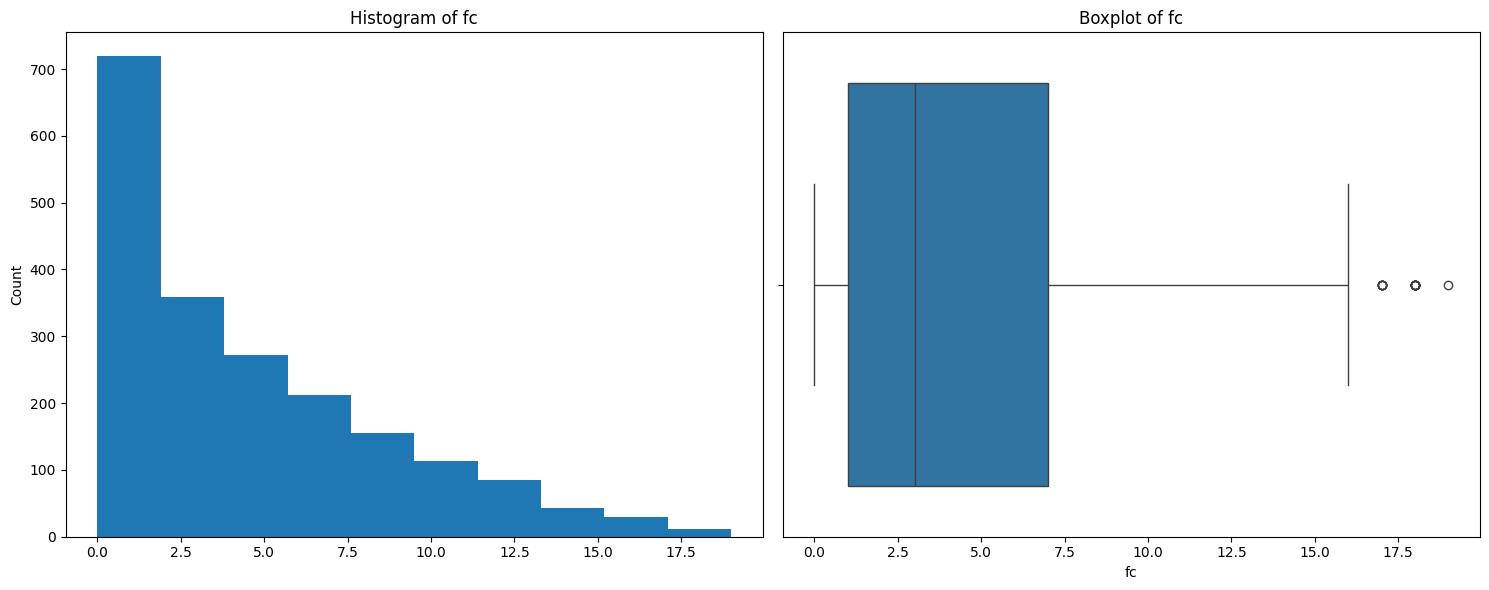


Column: int_memory
Skew : 0.06


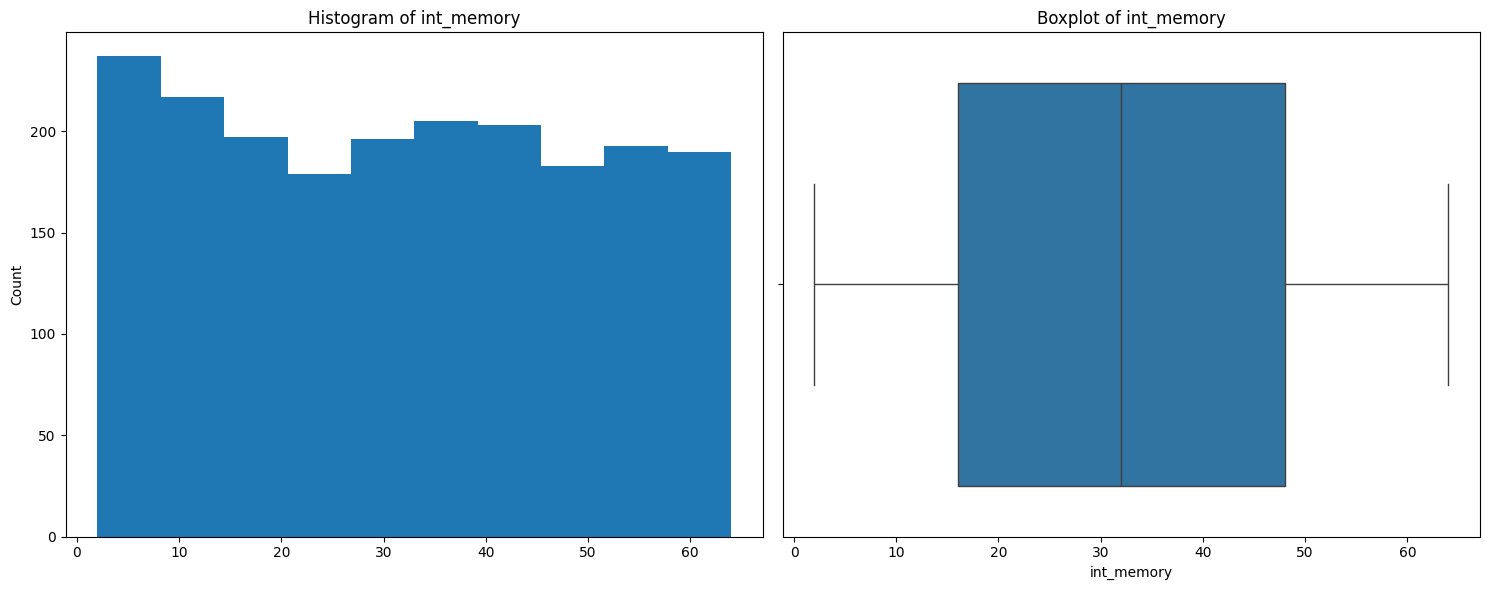


Column: mobile_wt
Skew : 0.01


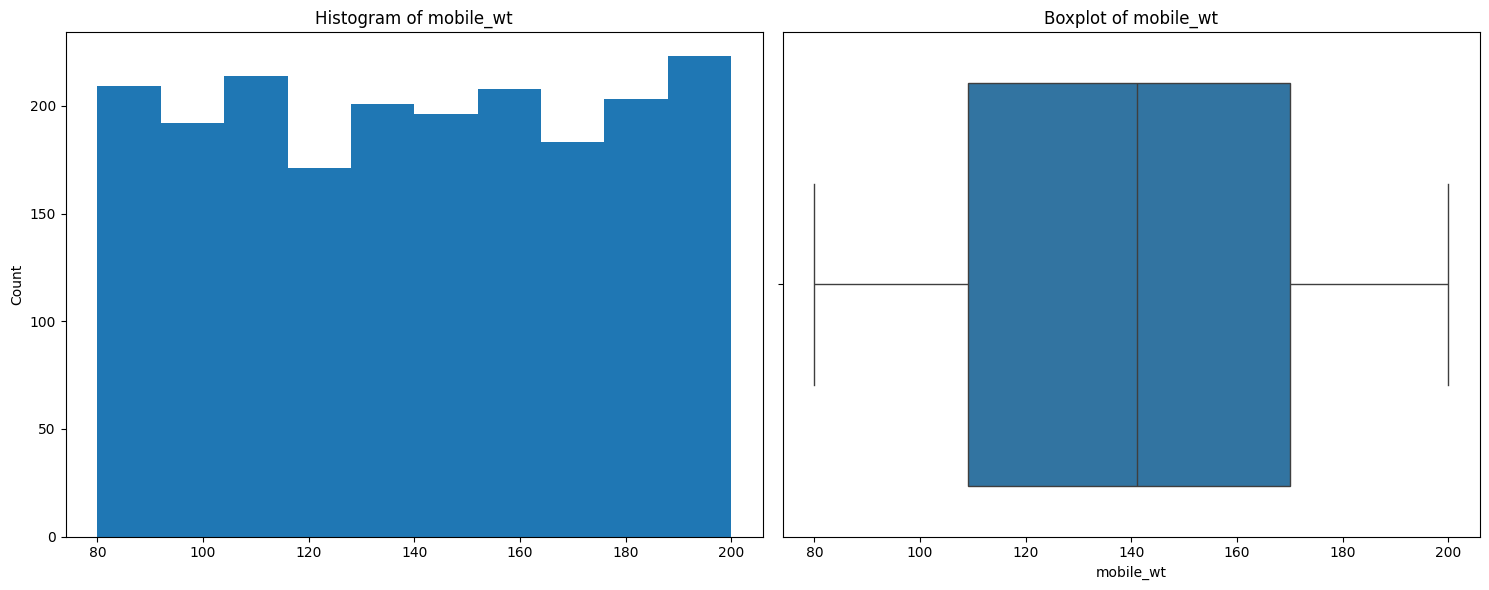


Column: pc
Skew : 0.02


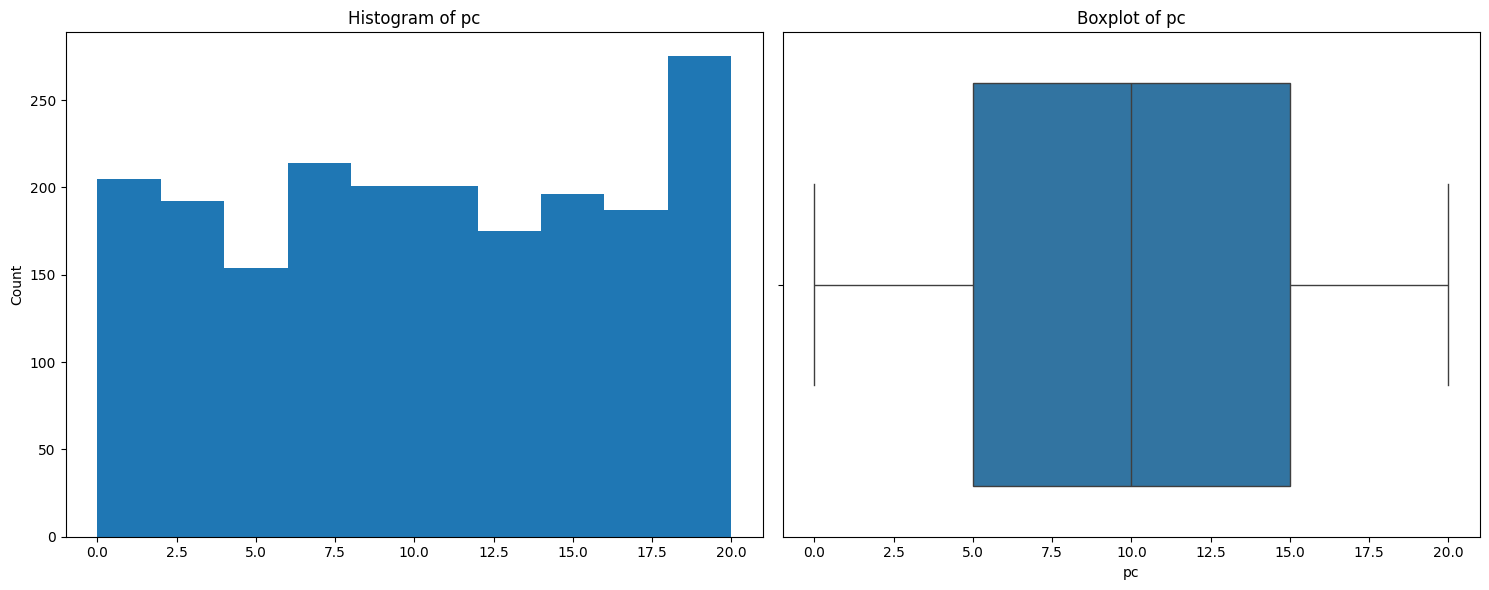


Column: px_height
Skew : 0.67


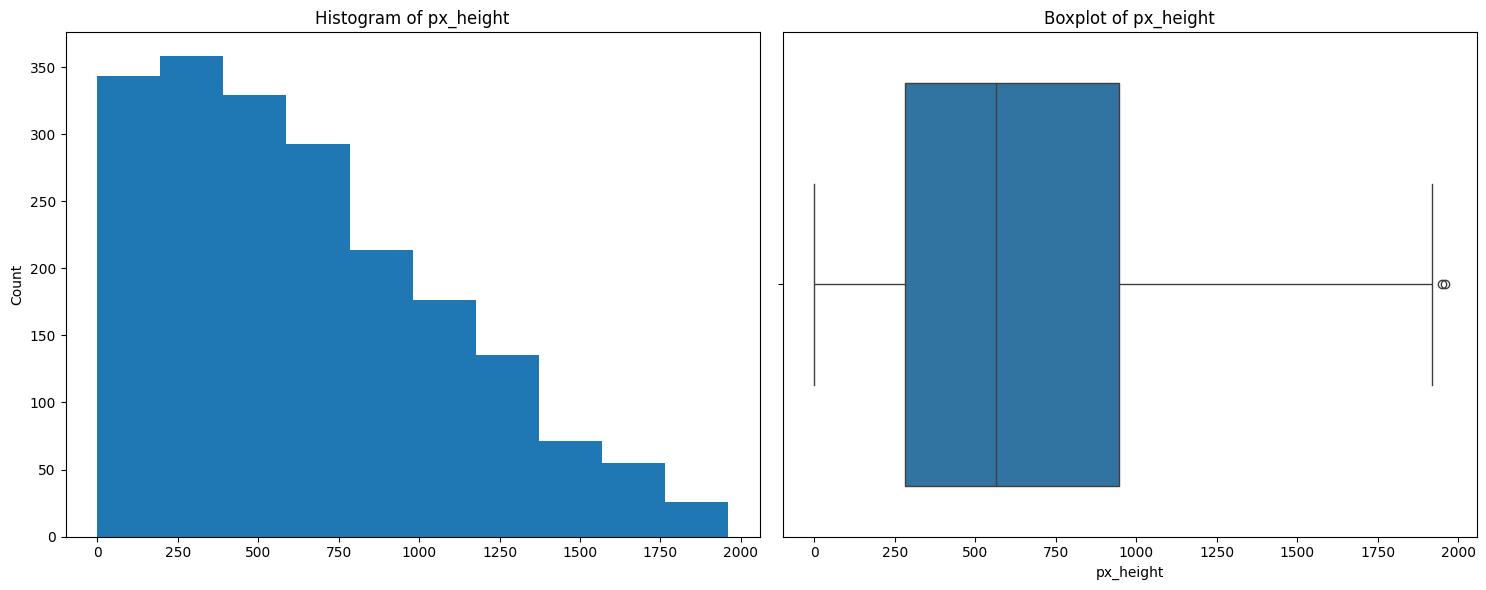


Column: px_width
Skew : 0.01


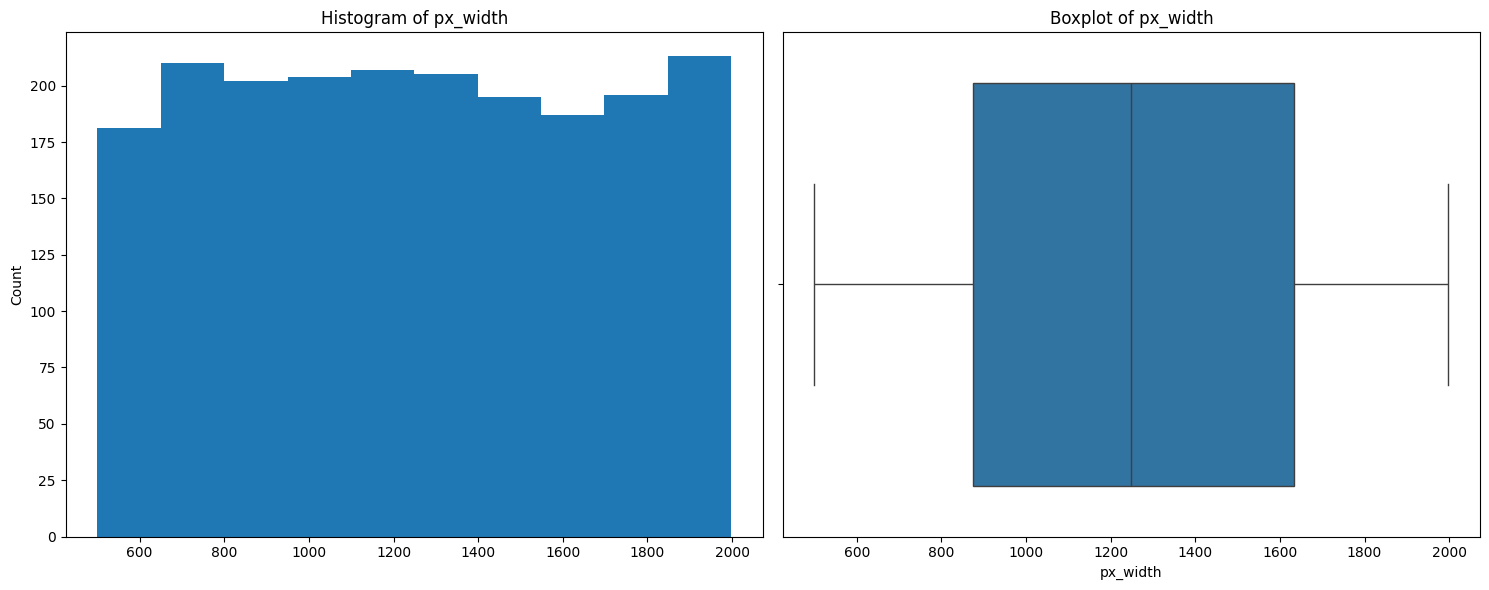


Column: ram
Skew : 0.01


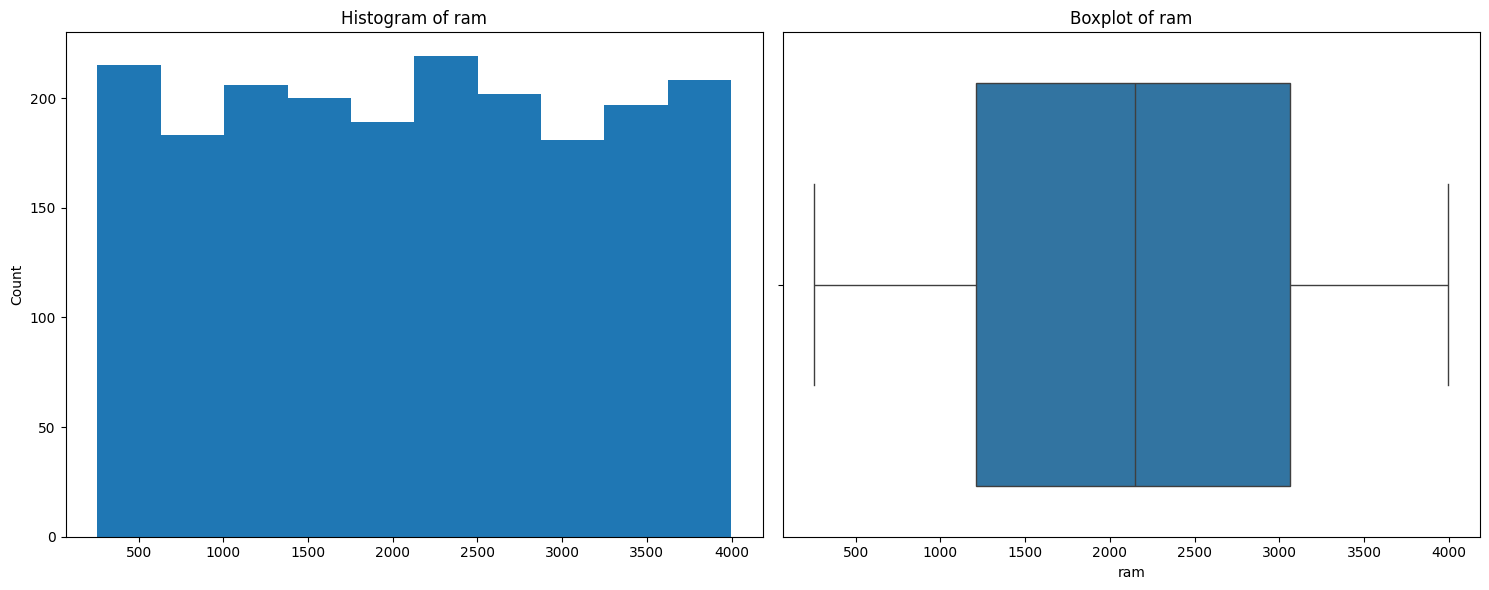


Column: sc_h
Skew : -0.1


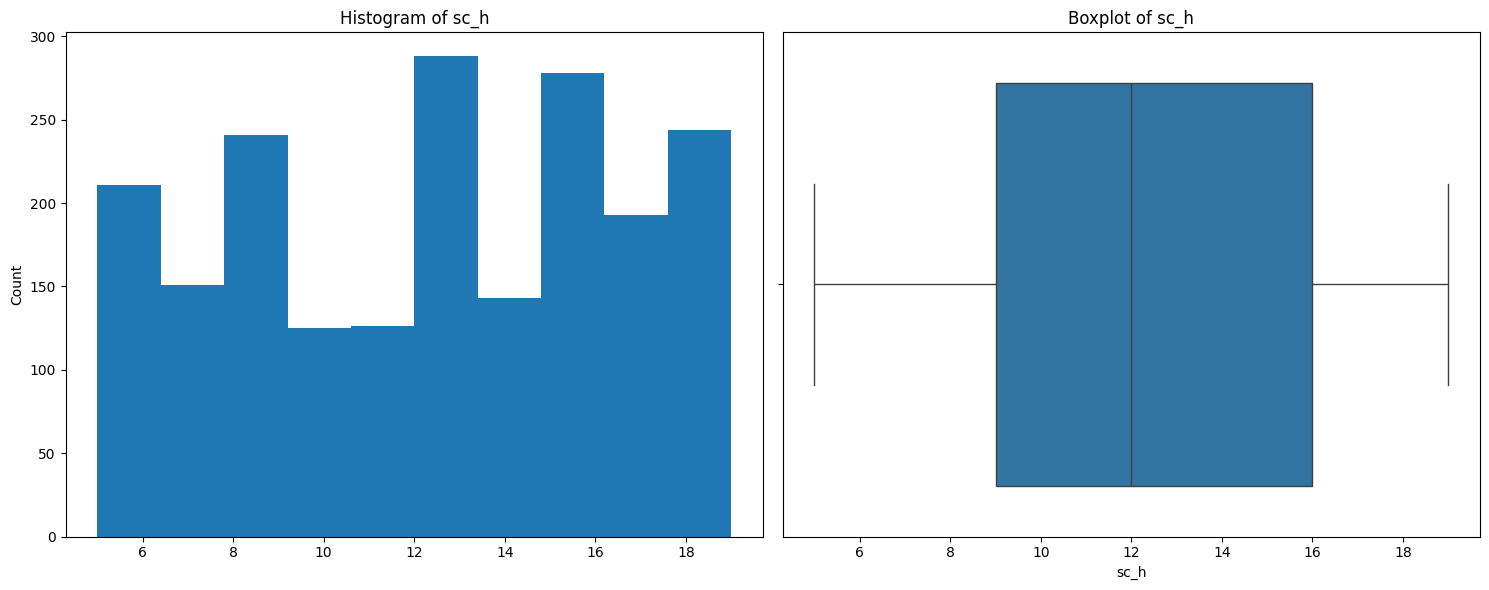


Column: sc_w
Skew : 0.63


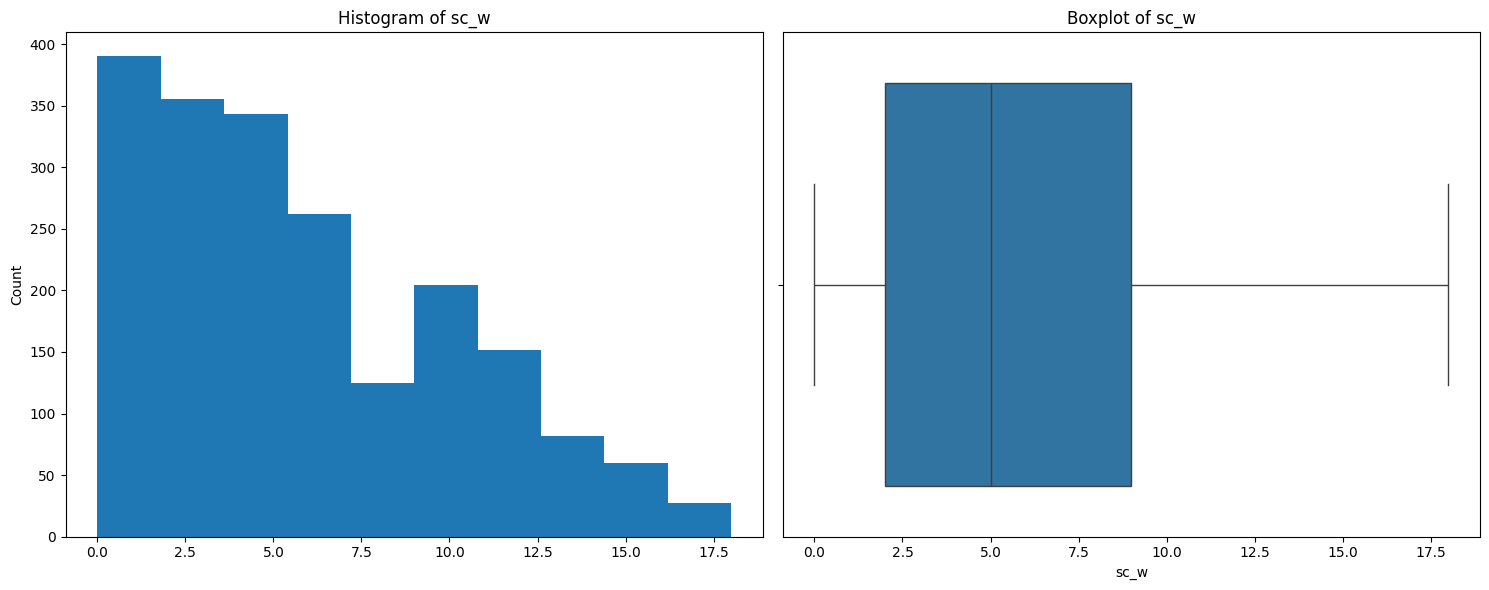


Column: talk_time
Skew : 0.01


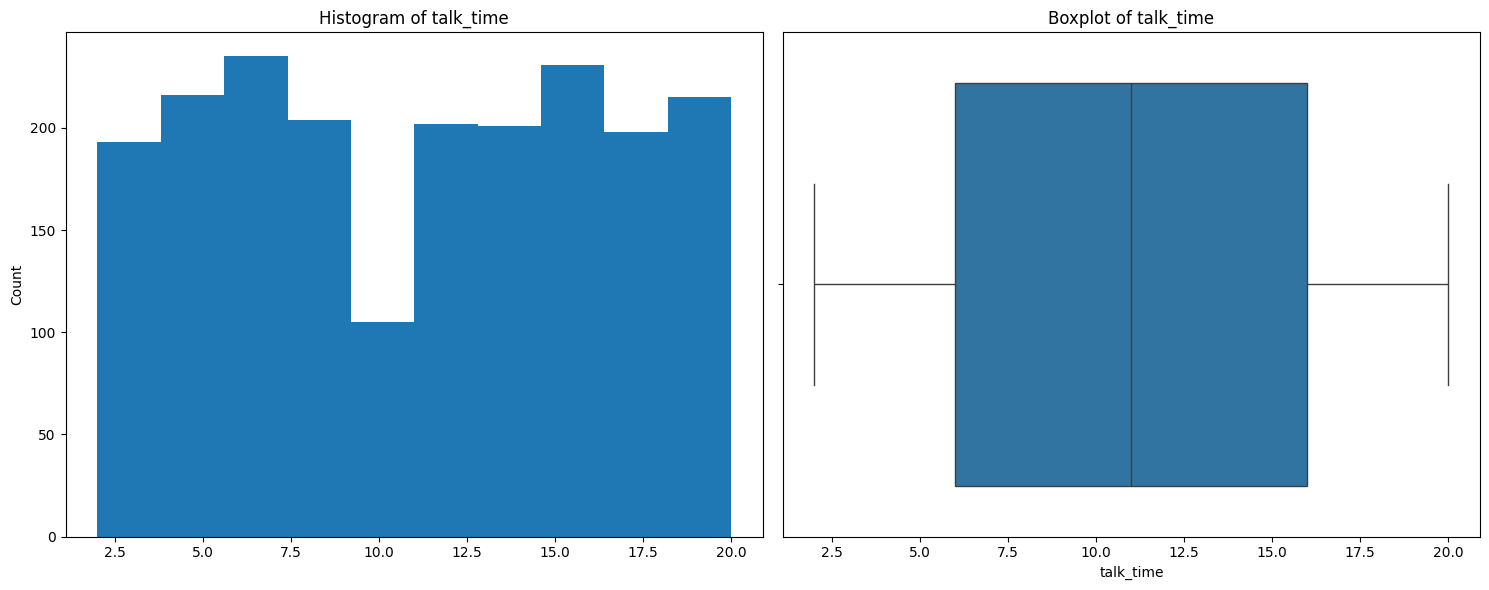

In [16]:
for col in num_cols:
    # Print column name and skew
    print(f"\nColumn: {col}")
    print(f"Skew :", round(df[col].skew(), 2))

    # Create a figure with subplots and set figsize for better readability
    plt.figure(figsize=(15, 6)) 

    # Subplot 1: Histogram with title
    plt.subplot(1, 2, 1)
    df[col].hist(grid=False)
    plt.title(f"Histogram of {col}") 
    plt.ylabel('Count')

    # Subplot 2: Boxplot with title
    plt.subplot(1, 2, 2)
    sns.boxplot(x=col, data=df)  
    plt.title(f"Boxplot of {col}")  
    
    plt.tight_layout()  
    plt.show()

* FC and Px-heig have outliers and all outliers.
* The big difference in the Dual Sim counts. IT might suggest errors or issues with the data, so it should be checked further.

EDA Bivariate Analysis

<Figure size 5000x6500 with 0 Axes>

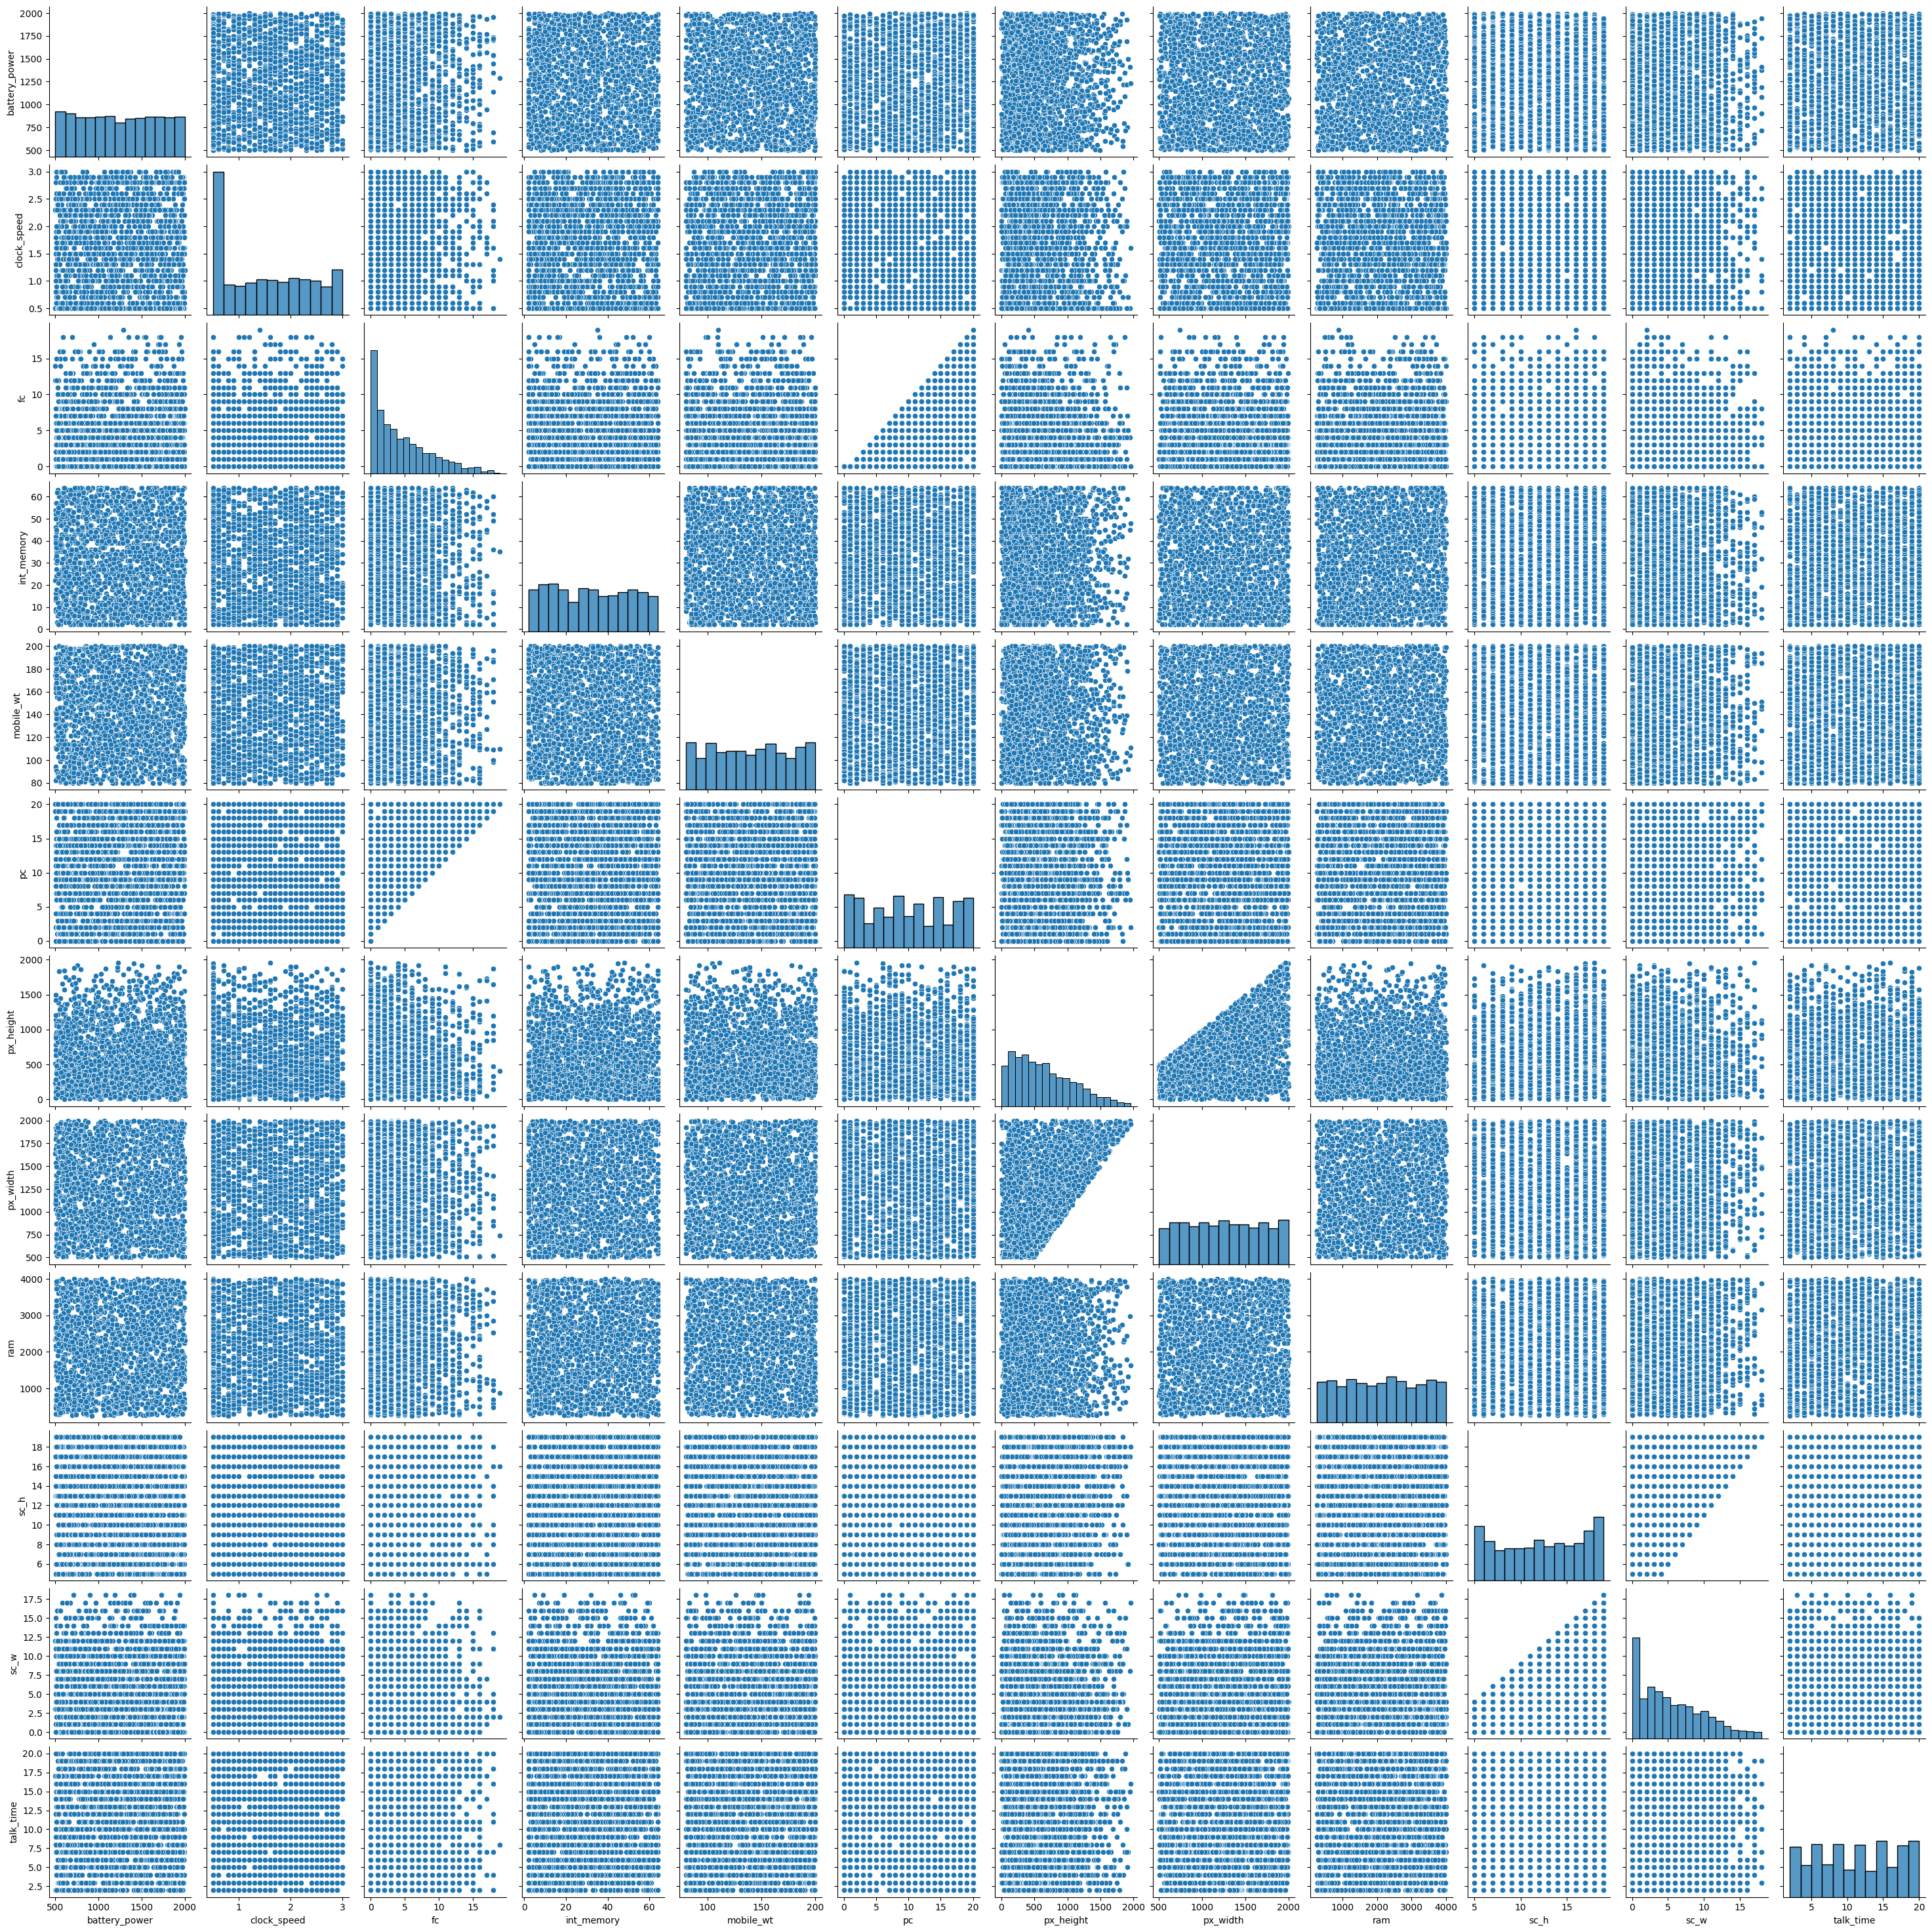

In [17]:
plt.figure(figsize=(50,65))
sns.pairplot(data=df.drop(['blue','dual_sim','three_g','touch_screen','wifi','price_range','four_g','m_dep','n_cores'],axis=1))
plt.show()

* The variable fc has a positive correlation with pc
* px-height is positively correlated with px-weight
* As sch-h increases, sch-w increases
* There is no linear relationship among other features

<Figure size 1200x600 with 0 Axes>

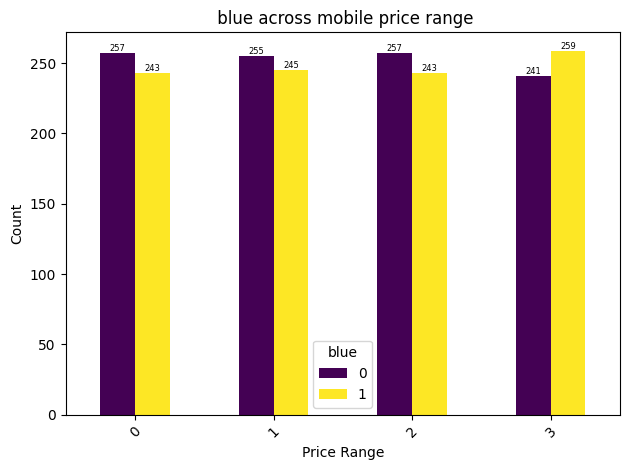

<Figure size 1200x600 with 0 Axes>

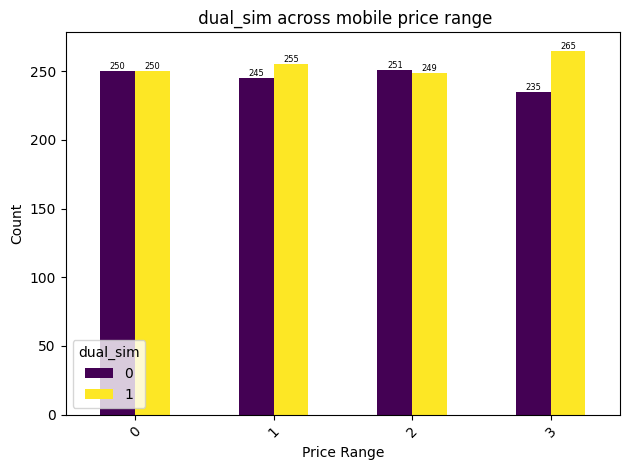

<Figure size 1200x600 with 0 Axes>

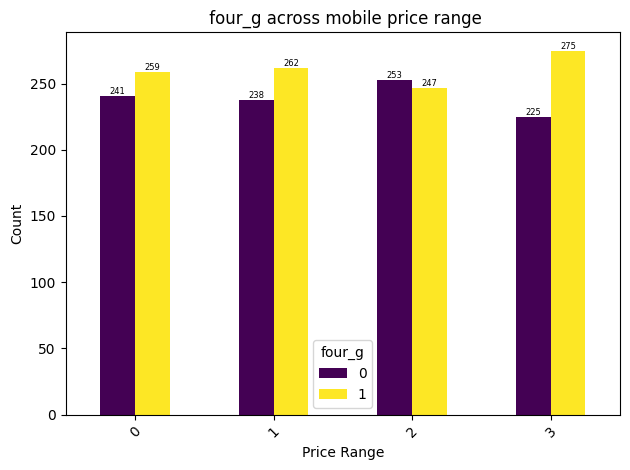

<Figure size 1200x600 with 0 Axes>

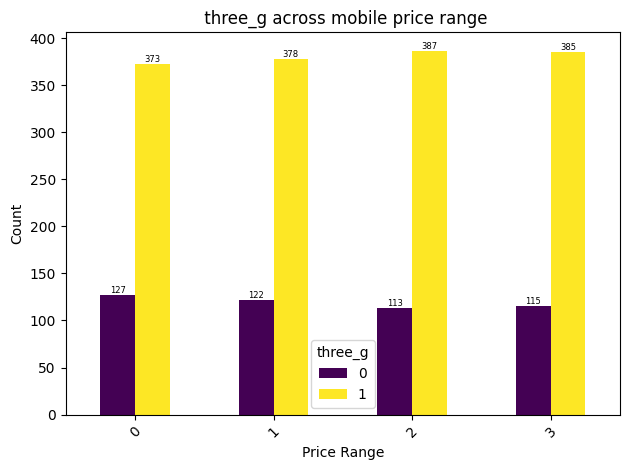

<Figure size 1200x600 with 0 Axes>

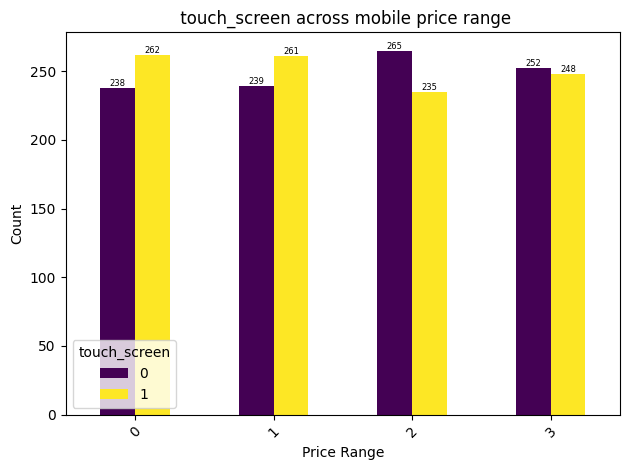

<Figure size 1200x600 with 0 Axes>

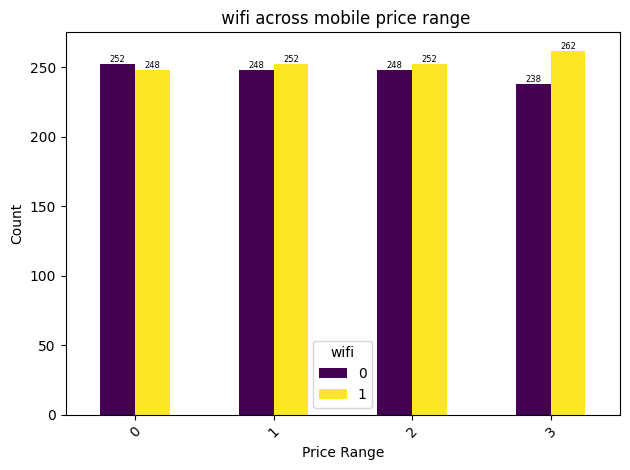

<Figure size 1200x600 with 0 Axes>

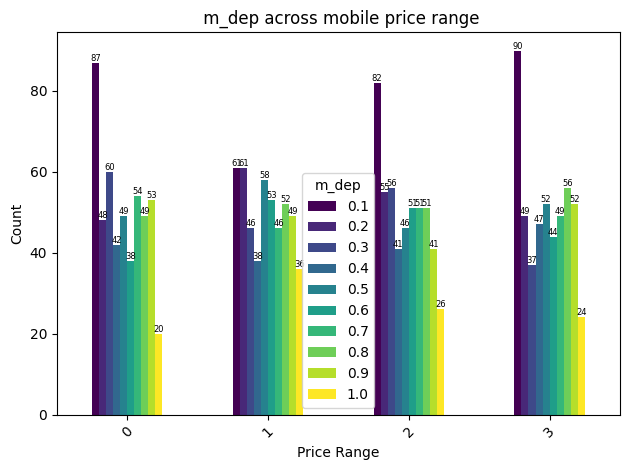

<Figure size 1200x600 with 0 Axes>

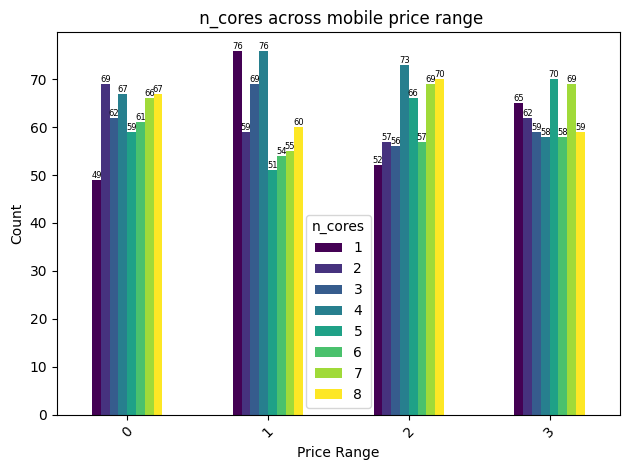

<Figure size 1200x600 with 0 Axes>

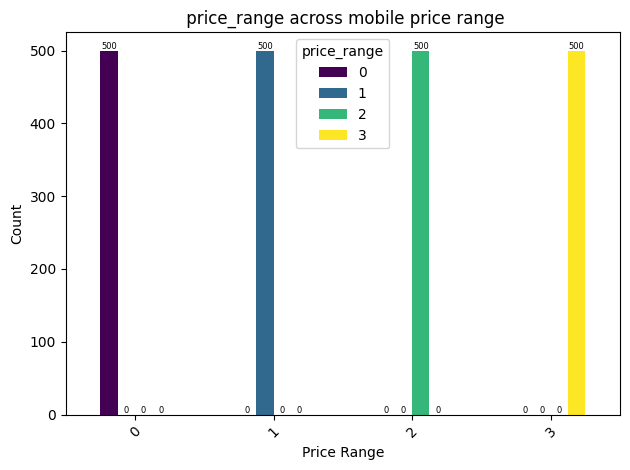

In [18]:
for col in cat_cols:
    # Group data by price_range and category
    grouped_data = df.groupby(['price_range', col]).size().unstack(fill_value=0)

    # Create a bar chart with price_range on the x-axis
    plt.figure(figsize=(12, 6))  
    ax = grouped_data.plot(kind='bar', stacked=False, colormap='viridis')
    plt.xlabel('Price Range')
    plt.ylabel('Count')
    plt.title(f' {col} across mobile price range' )

    # Add legend for categories
    plt.legend(title=col)

    # Rotate x-axis labels for better readability
    plt.xticks(rotation=45)

    # Annotate counts on top of each bar
    for p in ax.patches:
        height = p.get_height()
        ax.annotate(f'{height}', xy=(p.get_x() + p.get_width() / 2, height),
                    ha='center', va='bottom', fontsize=6)

    plt.tight_layout()
    plt.show()

EDA Multivariate Analysis

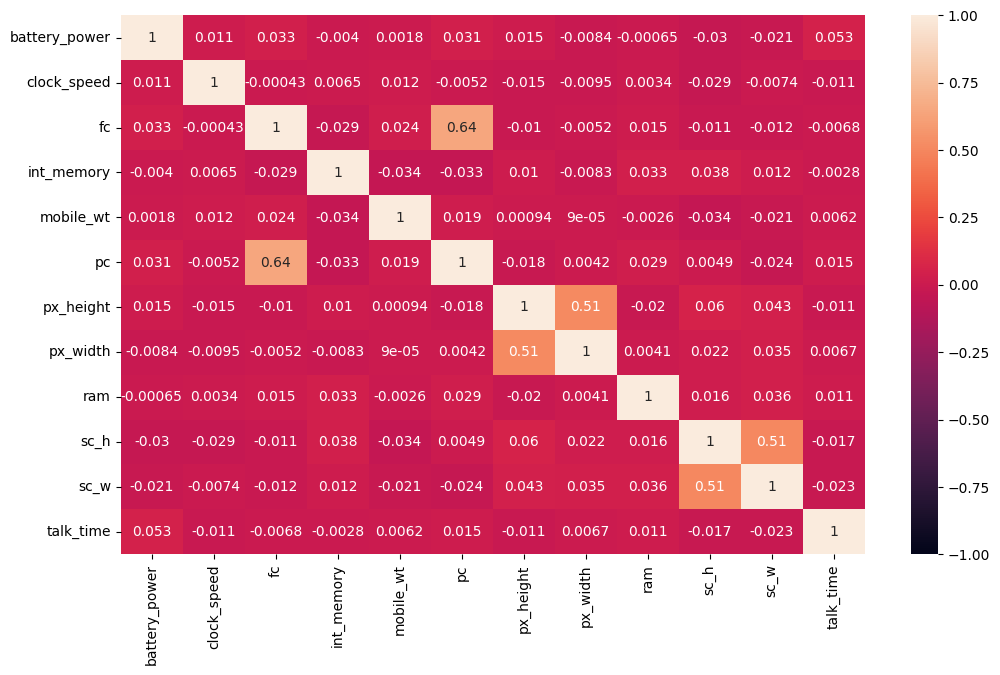

In [19]:
plt.figure(figsize=(12,7))
sns.heatmap(data=df.drop(['blue','dual_sim','three_g','touch_screen','wifi','price_range','four_g','m_dep','n_cores'],axis=1).corr(), annot = True, vmin = -1, vmax = 1)
plt.show()

* The variable fc has a positive correlation with pc
* px-height is positively correlated with px-weight
* As sch-h increases, sch-w increases
* Most of features don't have significant correlation.

Remove Outliers

In [20]:
# Define a function to remove outliers based on IQR
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

In [21]:
# Remove outliers in 'fc' and 'px_height' columns
df_cleaned = remove_outliers(df, 'fc')
df_cleaned = remove_outliers(df_cleaned, 'px_height')

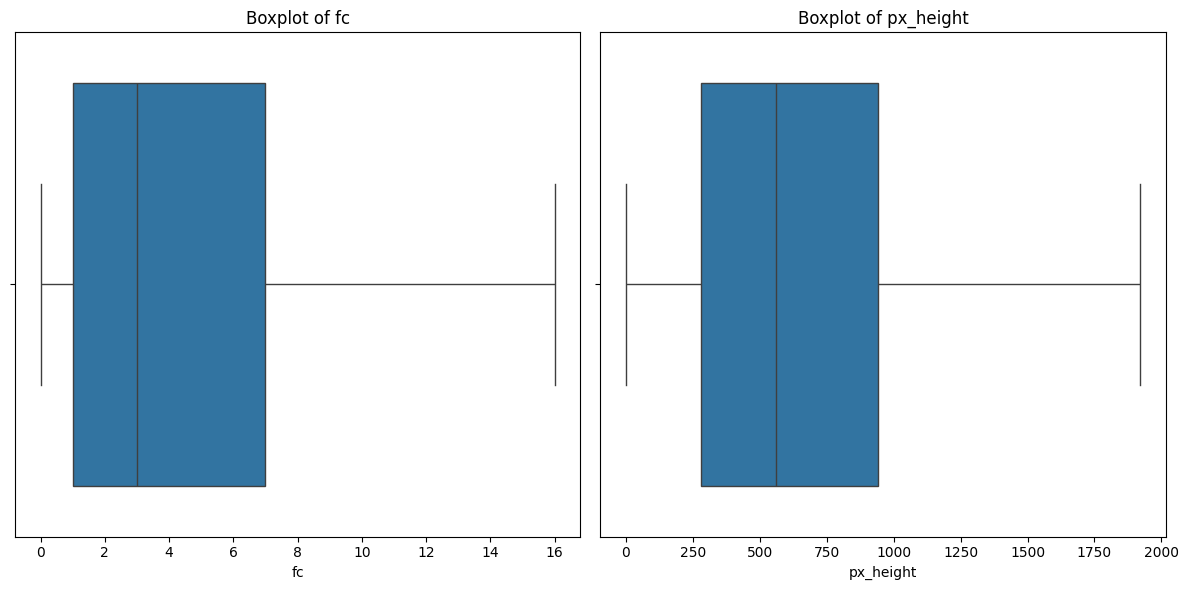

In [22]:
# List of columns you want to create box plots for
columns = ['fc', 'px_height']

# Create a single figure with subplots for each column
plt.figure(figsize=(12, 6)) 

# Loop through each column and create a subplot for it
for i, column in enumerate(columns):
    plt.subplot(1, len(columns), i + 1)
    sns.boxplot(x=df_cleaned[column])
    plt.title(f"Boxplot of {column}")
    plt.xlabel(column)  # Label for the x-axis

plt.tight_layout()  
plt.show()

Train Test Validation Split

In [23]:
# Split the dataset into training (60%) and remaining (40%)
train_data, remaining_data = train_test_split(df_cleaned, test_size=0.4, random_state=42)

In [24]:
# Split the remaining data into validation (50% of 40% = 20%) and test (50% of 40% = 20%)
val_data, test_data = train_test_split(remaining_data, test_size=0.5, random_state=42)

In [25]:
train_data.shape

(1188, 21)

In [26]:
val_data.shape

(396, 21)

In [27]:
test_data.shape

(396, 21)

In [28]:
# Save the training, validation, and test datasets as CSV files
train_data.to_csv('train_data.csv', index=False)

In [29]:
val_data.to_csv('val_data.csv', index=False)

In [30]:
test_data.to_csv('test_data.csv', index=False)